# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

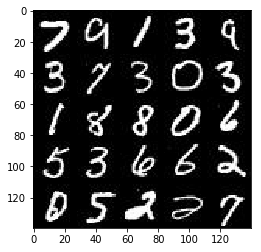

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

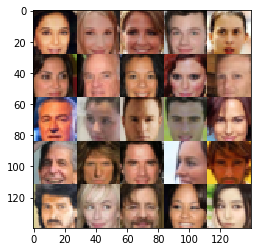

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(dtype = tf.float32, 
                                shape = (None, image_width, image_height, image_channels) , 
                                name = 'input_real')
   
    input_z = tf.placeholder(dtype = tf.float32 ,
                             shape = (None, z_dim) , 
                             name = 'input_z')
    
    # To remove ? Not used ?
    learning_rate = tf.placeholder(dtype = tf.float32 , name = 'learning_rate')

    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: 
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    # alpha parameter for the Leaky ReLu activation
    alpha = 0.2 
    
    # Feedback from Udacity reviewer : Tips & Tricks to improve GAN training 
    # https://github.com/soumith/ganhacks/blob/master/README.md
    # (Dropout rate 0.4-> drop 40%)
    dropout = 0.1
    
    # Tips & Tricks to improve GAN training : Add Regularization (0.0 to disable)
    regularizer = 0.02  # 0.0 # regularizer does not seem to make a big difference here, but I keep it
    
    
    # Choose minimum filter's depth for convolutions
    filters_depth = 64 
    
    
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # ( Input layer is 28x28x3 )
               
        # First layer - Convolution
        conv1 = tf.layers.conv2d(inputs= images ,
                                 filters= filters_depth, 
                                 kernel_size= (5,5), 
                                 strides= (2,2) ,
                                 padding='same',
                                 activation=None,
                                 kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=regularizer),
                                 use_bias=False )
        # No batch Normalization in fisrt convolution layer of discriminator
        # Add Dropout
        drop1 = tf.layers.dropout(inputs=conv1, rate=dropout, training=True)
        # First layer - Add Leaky ReLu activation after batch normalization
        activ1 = tf.maximum(drop1*alpha, drop1)
        # ( First layer output is 14x14x64 )
        
        # Second layer - Convolution
        conv2 = tf.layers.conv2d(inputs= activ1 ,
                                 filters= filters_depth*2, 
                                 kernel_size = (5,5), 
                                 strides= (1,1) ,
                                 padding='same',
                                 activation=None,
                                 kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=regularizer),
                                 use_bias=False )
        # Second layer - Add batch Normalization
        norm2 = tf.layers.batch_normalization(inputs=conv2, training=True )
        # Tips & Tricks to improve GAN training : Add Dropout
        drop2 = tf.layers.dropout(inputs=norm2, rate=dropout, training=True)
        # Second layer - Add Leaky ReLu activation after batch normalization
        activ2 = tf.maximum(drop2*alpha, drop2)
        # ( Second layer output is 7x7x6128)
        
        # Third layer - Convolution
        conv3 = tf.layers.conv2d(inputs= activ2 ,
                                 filters= filters_depth*4, 
                                 kernel_size= (5,5),  
                                 strides= (2,2) ,
                                 padding='same',
                                 activation=None,
                                 kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                 kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=regularizer),
                                 use_bias=False )
        # Third layer - Add batch Normalization
        norm3 = tf.layers.batch_normalization(inputs=conv3, training=True)
        # Tips & Tricks to improve GAN training : Add Dropout
        drop3 = tf.layers.dropout(inputs=norm3, rate=dropout, training=True)
        # Third layer - Add Leaky ReLu activation after batch normalization
        activ3 = tf.maximum(drop3*alpha, drop3)
        # ( Third layer output is 7x7*256 )
        
                    
        # Flatten/reshape to match the next dense layer
        # after convolutions,  images are w x h x f (7x7x96)
        w, h, f = int(activ3.shape[1]), int(activ3.shape[2]) , int(activ3.shape[3]) 
        flatten = tf.reshape(activ3, (-1, w*h*f))
        
        # Output layer 
        logits = tf.layers.dense(inputs=flatten , 
                                 units= 1, 
                                 activation=None ,
                                 kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=regularizer),
                                 use_bias=None) 
        
        out = tf.sigmoid(logits)
        
        # ( Output layer is 7x7x1 )
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    # alpha parameter for the Leaky ReLu activation
    alpha=0.2 

    # Feedback from Uddacity reviewer : Tips & Tricks to improve GAN training
    # https://github.com/soumith/ganhacks/blob/master/README.md
    # (Dropout rate 0.4-> drop 40%)
    dropout = 0.5 
    
    # Tips & Tricks to improve GAN training : Allow to force dropout use in both train and test
    # https://arxiv.org/pdf/1611.07004v1.pdf
    # https://github.com/soumith/ganhacks/blob/master/README.md
    drop_training = is_train # or True or False
    
    
    filters_depth = 128 
    
    with tf.variable_scope('generator', reuse=False if is_train==True else True ):
        
        # ( input layer dimension is out_channel_dim)
        
        # First layer - fully connected layer
        # without bias and without activation
        fc1 = tf.layers.dense(inputs=z , 
                              units= 7*7*filters_depth*4, 
                              activation=None, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer(),
                              use_bias=None)    
        # First layer - Reshape to match the convolution layer's size
        l1 = tf.reshape(fc1, shape=(-1, 7, 7, filters_depth*4)) 
        # Firts layer -  Add batch Normalization
        norm1 = tf.layers.batch_normalization(inputs=l1, training=is_train)
        # Tips & Tricks to improve GAN training : Add Dropout
        drop1 = tf.layers.dropout(inputs=norm1, rate=dropout, training=drop_training)
        # First layer - Add Leaky ReLU activation function after Normalization
        activ1 = tf.maximum(drop1*alpha, drop1)
        # out 7x7x512
        
                          
        # 2nd layer : Stack a Transposed convolution
        tconv2 = tf.layers.conv2d_transpose(inputs= activ1 ,
                                        activation= None, 
                                        filters= filters_depth*2, 
                                        kernel_size= (3,3), # use smaller kernel instead of (5,5), 
                                        padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                        strides=(1,1),
                                        use_bias=False)
        # Add batch Normalization
        norm2 = tf.layers.batch_normalization(inputs=tconv2, training=is_train)
        # Tips & Tricks to improve GAN training : Add Dropout
        drop2 = tf.layers.dropout(inputs=norm2, rate=dropout, training=drop_training)
        # Add Leaky ReLU activation function after Normalization
        activ2 = tf.maximum(drop2*alpha, drop2)
        # out 14x14x256        

        # 3rd layer : Stack a Transposed convolution
        tconv3 = tf.layers.conv2d_transpose(inputs= activ2 ,
                                            activation= None , 
                                            filters= filters_depth, 
                                            kernel_size= (5,5),   
                                            padding='same',
                                            kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                            strides=(2,2),
                                            use_bias=False)
        # Add batch Normalization
        norm3 = tf.layers.batch_normalization(inputs=tconv3, training=is_train)
        # Tips & Tricks to improve GAN training : Add Dropout
        drop3 = tf.layers.dropout(inputs=norm3, rate=dropout, training=drop_training)
        # Add Leaky ReLU activation function after Normalization
        activ3 = tf.maximum(drop3*alpha, drop3)
        # out 14x14x128
        
        
        # Optional layer : Does not seem make a difference in the quality of results in the end
        # (maybe lower Generator loss at the end of 1 epoch for the faces ?....so I keep it )
        tconv4 = tf.layers.conv2d_transpose(inputs= activ3 ,
                                        activation= None, 
                                        filters= int(filters_depth/2), 
                                        kernel_size= (3,3), 
                                        padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                        strides=(1,1),
                                        use_bias=False)
        # Add batch Normalization
        norm4 = tf.layers.batch_normalization(inputs=tconv4, training=is_train)
        # Tips & Tricks to improve GAN training : Add Dropout
        drop4 = tf.layers.dropout(inputs=norm4, rate=dropout, training=drop_training)
        # Add Leaky ReLU activation function after Normalization
        activ4 = tf.maximum(drop4*alpha, drop4)
        # out 14x14x64  
        
        
        
        # Output layer, 28x28x3
        logits = tf.layers.conv2d_transpose(inputs= activ4, #activ3 ,
                                            activation= None , 
                                            filters= out_channel_dim, 
                                            kernel_size= (5,5),   
                                            padding='same',
                                            kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                            strides=(2,2),
                                            use_bias=False)
        # No Batch normalization in output layer of generator
        out = tf.tanh(logits)
    
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=(tf.zeros_like(d_model_fake))))  
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake))) 
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize (Making sure the batch normalization layers can update their population statistics)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
# Define a function to be able to choose the sampling
# distribution to use for Z in order to improve GAN training
# https://github.com/soumith/ganhacks/blob/master/README.md
import numpy as np
def random_samples(batch_size, z_dim):
    
    # Select one of the two random distributions to use :
    
    mu, sigma = 0, 0.01 # mean and standard deviation
    rand = np.random.normal(mu, sigma, (batch_size, z_dim))
    
    #rand = np.random.uniform(-1, 1, size=(batch_size, z_dim))
    
    return rand

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    
    # Tips & Tricks to improve GAN training : Sample from a Gaussian Distribution
    #example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])
    example_z =  random_samples(batch_size, z_dim)
    
    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
# For each images batch, we will need to scale the real images data into the 
# same value range as the generated one (-1,1) range because the generator output
# is using tanh in its last layer
def scale(x, feature_range=(-1, 1)):
    """
    Scale x into the provided feature range
    :param x: input data to scale
    :param feature_range: (min, max) tuple values to use for scaling x
    :return x: Scaled x
    """
    # scale to (0, 1)
    # x = ((x - x.min())/(255 - x.min()))
    # scale to feature_range
    #min, max = feature_range
    #x = x * (max - min) + min
    
    # or just simply 
    x=x*2
    #print(x)
       
    return x

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    :param show_every: Show generator output steps frequency
    """

    
    
    show_every=100
    
    # Monitoring (Execution time)
    import time
    start_time = time.time()
    
    # TODO: Build Model
    
    # Learning rate is provided in train parameters
    input_real, input_z, _ = model_inputs(image_width=data_shape[1] , 
                                         image_height=data_shape[2], 
                                         image_channels=data_shape[3],
                                         z_dim=z_dim)

    d_loss, g_loss = model_loss(input_real=input_real,
                                input_z=input_z,
                                out_channel_dim=data_shape[3])
        
    d_opt, g_opt = model_opt(d_loss=d_loss,
                             g_loss=g_loss,
                             learning_rate=learning_rate,
                             beta1=beta1)
    
    # Train the Model
     
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        
        
        steps=0
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1

                # Sample random noise for G
                #batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_z =  random_samples(batch_size, z_dim)
                
                # Run optimizer for Disciriminator
                _ = sess.run(d_opt, feed_dict={input_real: scale(batch_images),
                                               input_z: batch_z})
                
                # Run optimizer for Generator 
                # Tips & Tricks to improve GAN training: Train the generator more than the discriminator   
                # https://github.com/soumith/ganhacks/blob/master/README.md
                if (steps < 10000):    # always (super)boost training for generator with this setting
                    boost_gen_train = 3
                else:
                    boost_gen_train = 1
                for _ in range(boost_gen_train):
                    _ = sess.run(g_opt, feed_dict={input_real: scale(batch_images),
                                 input_z: batch_z})


                # Every 100 batches, print the losses and print 1 image
                if (steps % show_every == 0) or (steps==1):
                                       
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: scale(batch_images)})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                


                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g),
                          "Elapsed_time = {:.1f} min".format((time.time()-start_time)/60),
                          "Steps=  {}".format(steps))
                    
                    show_generator_output(sess=sess,
                                          n_images=25,
                                          input_z=input_z,
                                          out_channel_dim=data_shape[3],
                                          image_mode=data_image_mode)
                    
                    
                    
        # Monitoring   
        print("\nTotal Training time = {:.1f} min".format((time.time()-start_time)/60),
        "Discriminator Loss: {:.4f}...".format(train_loss_d),
        "Generator Loss: {:.4f}".format(train_loss_g))                                       

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.5709... Generator Loss: 0.1066 Elapsed_time = 0.1 min Steps=  1


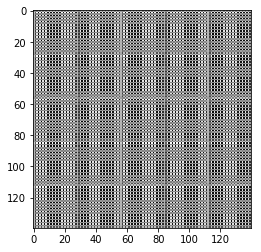

Epoch 1/2... Discriminator Loss: 1.4698... Generator Loss: 0.6574 Elapsed_time = 0.7 min Steps=  100


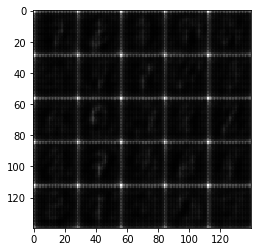

Epoch 1/2... Discriminator Loss: 1.3158... Generator Loss: 0.9317 Elapsed_time = 1.4 min Steps=  200


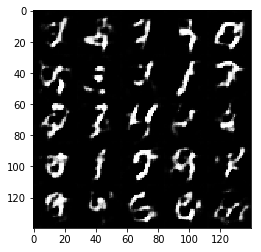

Epoch 1/2... Discriminator Loss: 1.5848... Generator Loss: 1.3089 Elapsed_time = 2.0 min Steps=  300


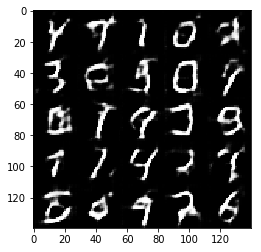

Epoch 1/2... Discriminator Loss: 1.5939... Generator Loss: 1.2017 Elapsed_time = 2.7 min Steps=  400


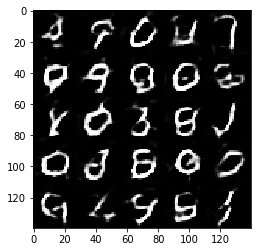

Epoch 1/2... Discriminator Loss: 1.5902... Generator Loss: 0.4058 Elapsed_time = 3.4 min Steps=  500


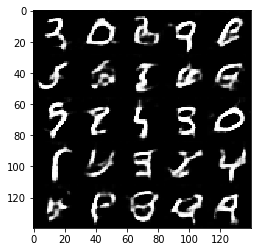

Epoch 1/2... Discriminator Loss: 1.2629... Generator Loss: 0.8361 Elapsed_time = 4.0 min Steps=  600


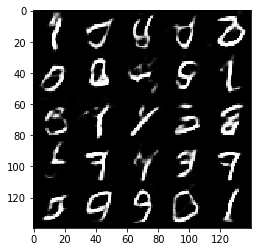

Epoch 1/2... Discriminator Loss: 1.5594... Generator Loss: 0.5656 Elapsed_time = 4.7 min Steps=  700


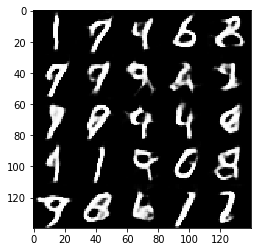

Epoch 1/2... Discriminator Loss: 1.2751... Generator Loss: 1.0543 Elapsed_time = 5.4 min Steps=  800


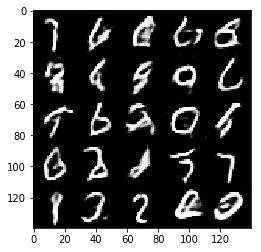

Epoch 1/2... Discriminator Loss: 1.0818... Generator Loss: 1.1774 Elapsed_time = 6.1 min Steps=  900


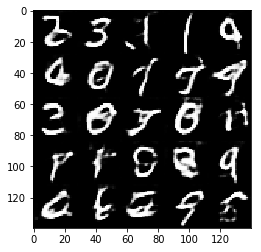

Epoch 1/2... Discriminator Loss: 1.4427... Generator Loss: 1.0011 Elapsed_time = 6.7 min Steps=  1000


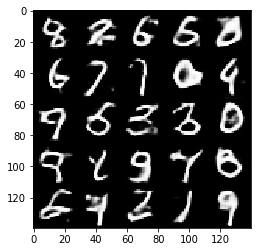

Epoch 1/2... Discriminator Loss: 1.2445... Generator Loss: 1.2552 Elapsed_time = 7.4 min Steps=  1100


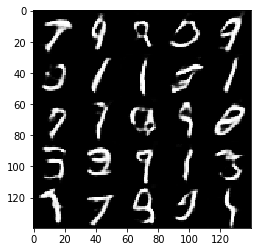

Epoch 1/2... Discriminator Loss: 0.9700... Generator Loss: 1.4136 Elapsed_time = 8.0 min Steps=  1200


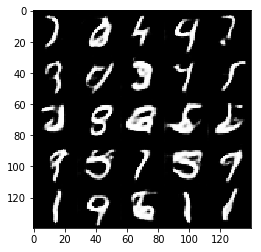

Epoch 1/2... Discriminator Loss: 1.0380... Generator Loss: 1.2544 Elapsed_time = 8.7 min Steps=  1300


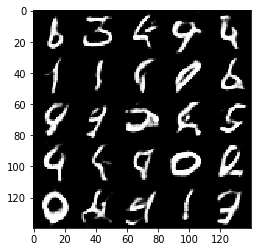

Epoch 1/2... Discriminator Loss: 1.0342... Generator Loss: 0.7740 Elapsed_time = 9.4 min Steps=  1400


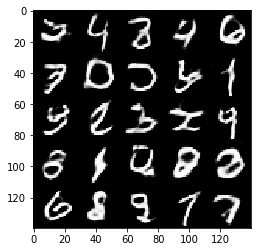

Epoch 1/2... Discriminator Loss: 1.0526... Generator Loss: 1.6453 Elapsed_time = 10.1 min Steps=  1500


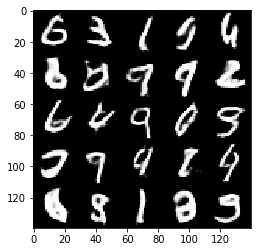

Epoch 1/2... Discriminator Loss: 1.1598... Generator Loss: 0.7218 Elapsed_time = 10.7 min Steps=  1600


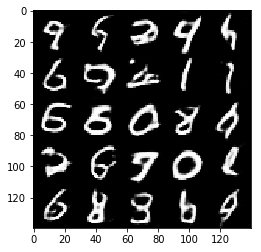

Epoch 1/2... Discriminator Loss: 0.8734... Generator Loss: 1.4831 Elapsed_time = 11.4 min Steps=  1700


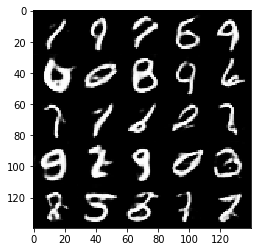

Epoch 1/2... Discriminator Loss: 0.8283... Generator Loss: 1.6539 Elapsed_time = 12.1 min Steps=  1800


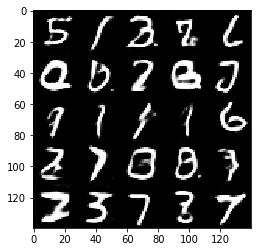

Epoch 1/2... Discriminator Loss: 0.8264... Generator Loss: 2.1164 Elapsed_time = 12.7 min Steps=  1900


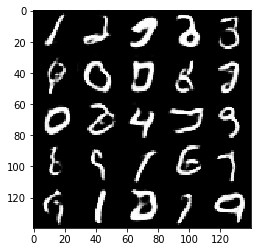

Epoch 1/2... Discriminator Loss: 0.8715... Generator Loss: 1.9171 Elapsed_time = 13.4 min Steps=  2000


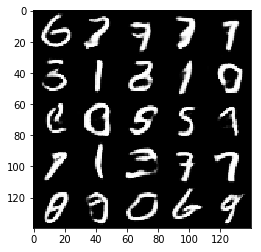

Epoch 2/2... Discriminator Loss: 0.7688... Generator Loss: 1.4443 Elapsed_time = 14.1 min Steps=  2100


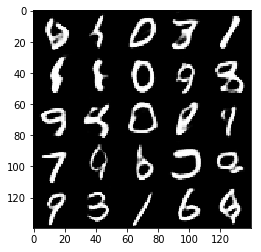

Epoch 2/2... Discriminator Loss: 1.0721... Generator Loss: 0.8434 Elapsed_time = 14.7 min Steps=  2200


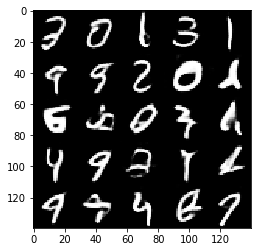

Epoch 2/2... Discriminator Loss: 0.8814... Generator Loss: 1.9585 Elapsed_time = 15.4 min Steps=  2300


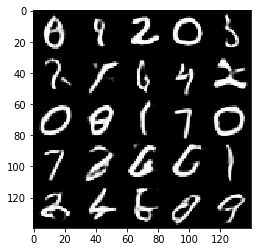

Epoch 2/2... Discriminator Loss: 1.0075... Generator Loss: 1.6138 Elapsed_time = 16.1 min Steps=  2400


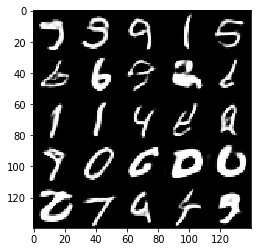

Epoch 2/2... Discriminator Loss: 0.7931... Generator Loss: 1.3027 Elapsed_time = 16.8 min Steps=  2500


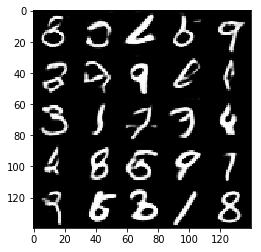

Epoch 2/2... Discriminator Loss: 0.6549... Generator Loss: 1.8675 Elapsed_time = 17.4 min Steps=  2600


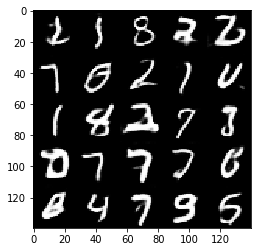

Epoch 2/2... Discriminator Loss: 1.1378... Generator Loss: 1.6747 Elapsed_time = 18.1 min Steps=  2700


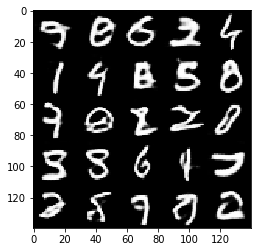

Epoch 2/2... Discriminator Loss: 0.7724... Generator Loss: 1.8179 Elapsed_time = 18.8 min Steps=  2800


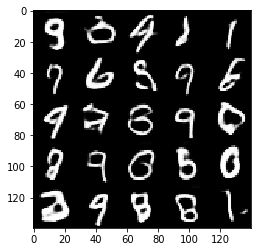

Epoch 2/2... Discriminator Loss: 0.5142... Generator Loss: 2.5191 Elapsed_time = 19.4 min Steps=  2900


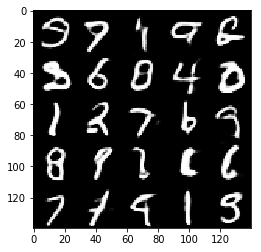

Epoch 2/2... Discriminator Loss: 0.6211... Generator Loss: 2.1409 Elapsed_time = 20.1 min Steps=  3000


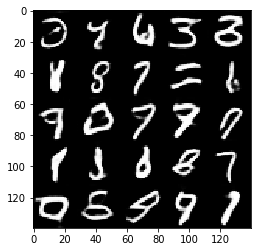

Epoch 2/2... Discriminator Loss: 1.2292... Generator Loss: 0.9889 Elapsed_time = 20.7 min Steps=  3100


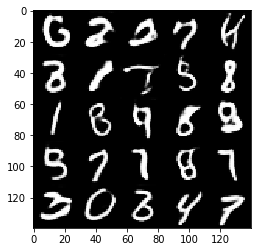

Epoch 2/2... Discriminator Loss: 0.6223... Generator Loss: 2.5078 Elapsed_time = 21.4 min Steps=  3200


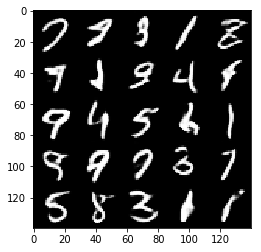

Epoch 2/2... Discriminator Loss: 1.0363... Generator Loss: 1.2102 Elapsed_time = 22.1 min Steps=  3300


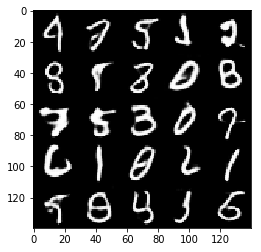

Epoch 2/2... Discriminator Loss: 0.8056... Generator Loss: 1.6201 Elapsed_time = 22.7 min Steps=  3400


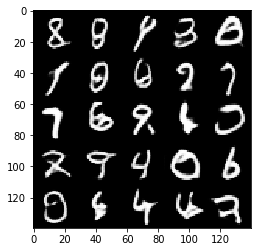

Epoch 2/2... Discriminator Loss: 1.3898... Generator Loss: 0.8308 Elapsed_time = 23.4 min Steps=  3500


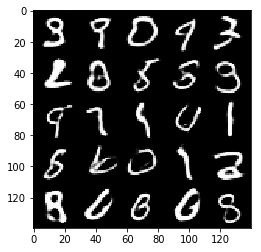

Epoch 2/2... Discriminator Loss: 1.0097... Generator Loss: 1.2989 Elapsed_time = 24.0 min Steps=  3600


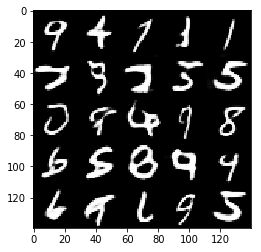

Epoch 2/2... Discriminator Loss: 0.6125... Generator Loss: 2.8609 Elapsed_time = 24.7 min Steps=  3700


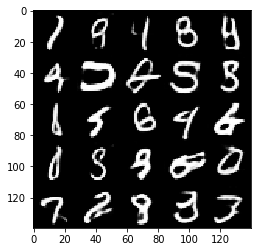

Epoch 2/2... Discriminator Loss: 0.7143... Generator Loss: 2.6064 Elapsed_time = 25.4 min Steps=  3800


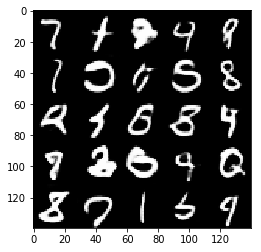

Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 1.2015 Elapsed_time = 26.0 min Steps=  3900


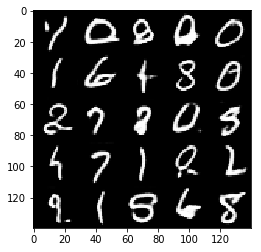

Epoch 2/2... Discriminator Loss: 0.4883... Generator Loss: 2.3068 Elapsed_time = 26.7 min Steps=  4000


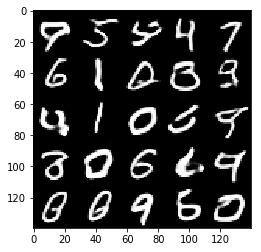


Total Training time = 26.7 min Discriminator Loss: 0.4883... Generator Loss: 2.3068


In [ ]:
batch_size = 30 #25 is fine too
z_dim = 100
learning_rate = 0.0004 #0.0006 
beta1 = 0.5
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7119... Generator Loss: 2.3207 Elapsed_time = 0.1 min Steps=  1


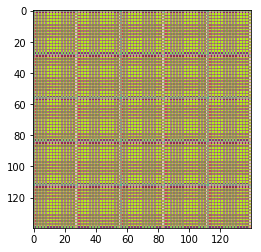

Epoch 1/1... Discriminator Loss: 1.1870... Generator Loss: 0.7258 Elapsed_time = 0.8 min Steps=  100


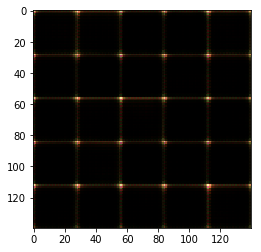

Epoch 1/1... Discriminator Loss: 1.6652... Generator Loss: 1.0539 Elapsed_time = 1.5 min Steps=  200


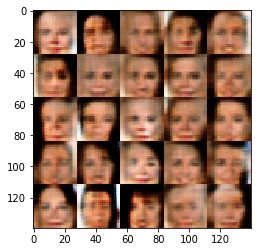

Epoch 1/1... Discriminator Loss: 1.7052... Generator Loss: 0.5490 Elapsed_time = 2.2 min Steps=  300


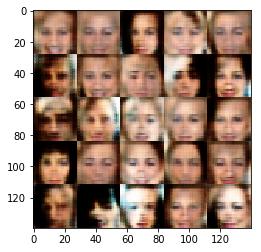

Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.8860 Elapsed_time = 2.9 min Steps=  400


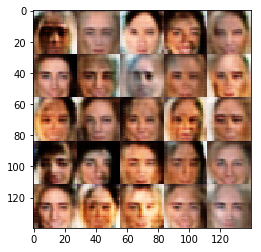

Epoch 1/1... Discriminator Loss: 1.4641... Generator Loss: 1.2961 Elapsed_time = 3.6 min Steps=  500


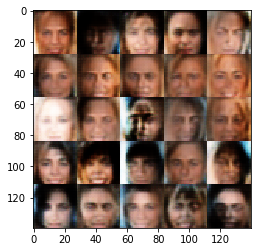

Epoch 1/1... Discriminator Loss: 1.5774... Generator Loss: 1.3530 Elapsed_time = 4.3 min Steps=  600


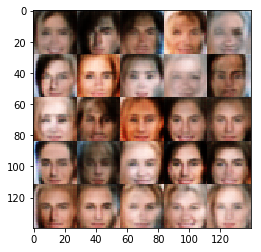

Epoch 1/1... Discriminator Loss: 1.5366... Generator Loss: 0.3934 Elapsed_time = 5.0 min Steps=  700


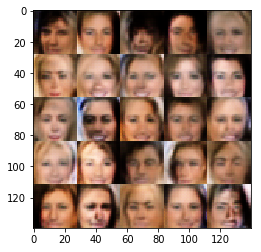

Epoch 1/1... Discriminator Loss: 1.5274... Generator Loss: 1.3457 Elapsed_time = 5.7 min Steps=  800


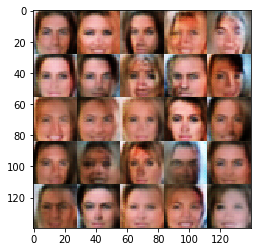

Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 1.2544 Elapsed_time = 6.4 min Steps=  900


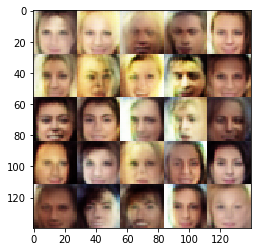

Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.9363 Elapsed_time = 7.1 min Steps=  1000


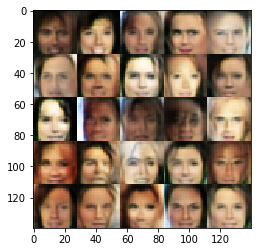

Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.6209 Elapsed_time = 7.8 min Steps=  1100


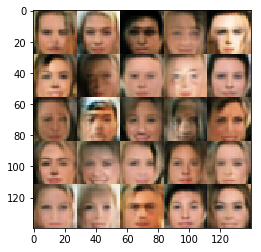

Epoch 1/1... Discriminator Loss: 1.5995... Generator Loss: 0.5089 Elapsed_time = 8.5 min Steps=  1200


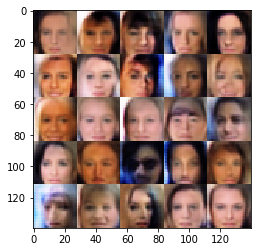

Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.9948 Elapsed_time = 9.2 min Steps=  1300


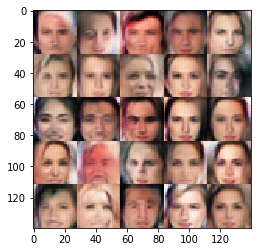

Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.7250 Elapsed_time = 9.9 min Steps=  1400


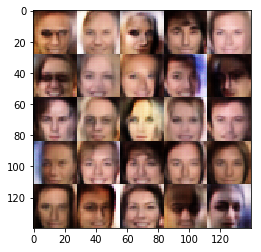

Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.7796 Elapsed_time = 10.6 min Steps=  1500


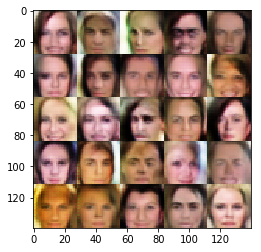

Epoch 1/1... Discriminator Loss: 1.2486... Generator Loss: 0.7717 Elapsed_time = 11.3 min Steps=  1600


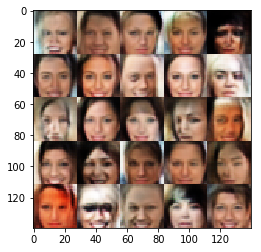

Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 0.5546 Elapsed_time = 12.1 min Steps=  1700


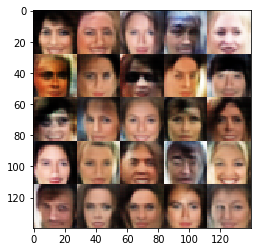

Epoch 1/1... Discriminator Loss: 1.3375... Generator Loss: 1.1738 Elapsed_time = 12.8 min Steps=  1800


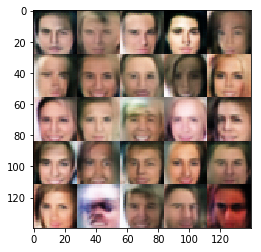

Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 1.1887 Elapsed_time = 13.5 min Steps=  1900


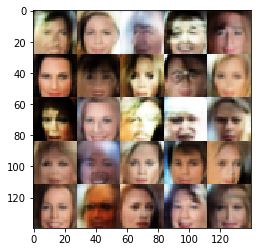

Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 0.8511 Elapsed_time = 14.2 min Steps=  2000


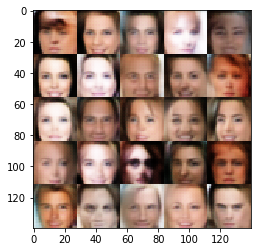

Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 0.9002 Elapsed_time = 14.9 min Steps=  2100


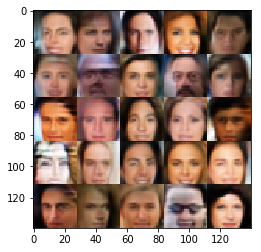

Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.5593 Elapsed_time = 15.6 min Steps=  2200


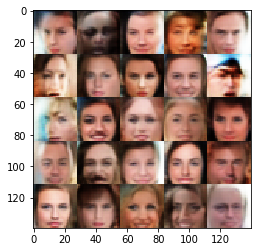

Epoch 1/1... Discriminator Loss: 0.9589... Generator Loss: 1.4633 Elapsed_time = 16.4 min Steps=  2300


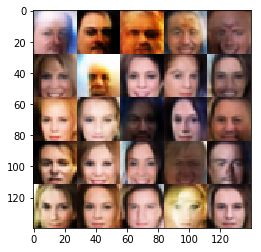

Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.6948 Elapsed_time = 17.1 min Steps=  2400


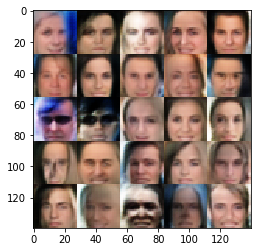

Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 1.1565 Elapsed_time = 17.8 min Steps=  2500


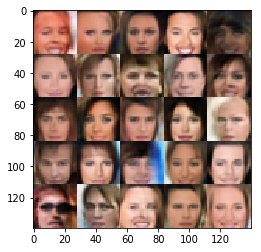

Epoch 1/1... Discriminator Loss: 1.1747... Generator Loss: 0.9687 Elapsed_time = 18.5 min Steps=  2600


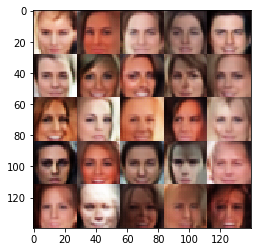

Epoch 1/1... Discriminator Loss: 1.3570... Generator Loss: 1.7386 Elapsed_time = 19.2 min Steps=  2700


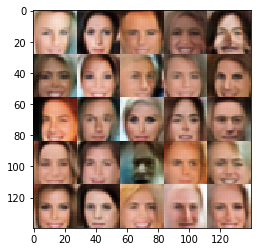

Epoch 1/1... Discriminator Loss: 0.8971... Generator Loss: 1.6893 Elapsed_time = 19.9 min Steps=  2800


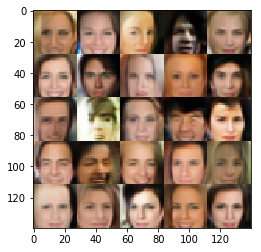

Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 2.1209 Elapsed_time = 20.6 min Steps=  2900


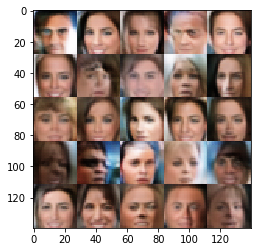

Epoch 1/1... Discriminator Loss: 0.9700... Generator Loss: 1.9263 Elapsed_time = 21.3 min Steps=  3000


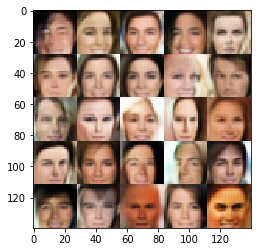

Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.8015 Elapsed_time = 22.0 min Steps=  3100


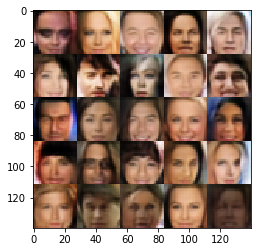

Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 1.5150 Elapsed_time = 22.7 min Steps=  3200


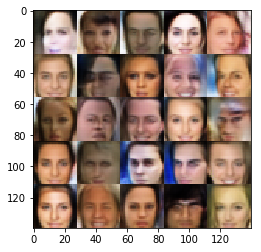

Epoch 1/1... Discriminator Loss: 0.9767... Generator Loss: 0.9482 Elapsed_time = 23.4 min Steps=  3300


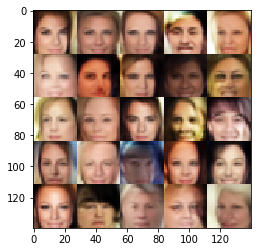

Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 0.8367 Elapsed_time = 24.1 min Steps=  3400


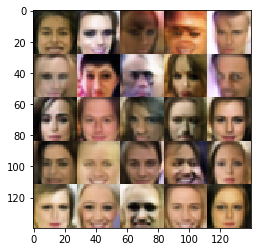

Epoch 1/1... Discriminator Loss: 2.1310... Generator Loss: 3.1429 Elapsed_time = 24.8 min Steps=  3500


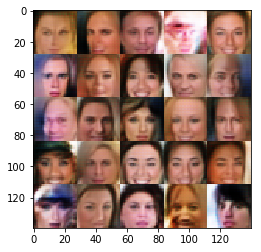

Epoch 1/1... Discriminator Loss: 0.7215... Generator Loss: 1.4259 Elapsed_time = 25.5 min Steps=  3600


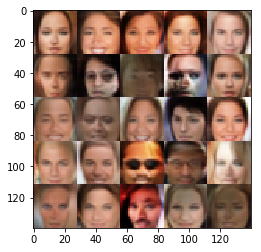

Epoch 1/1... Discriminator Loss: 0.8566... Generator Loss: 1.2015 Elapsed_time = 26.3 min Steps=  3700


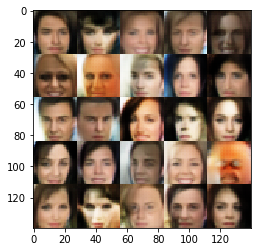

Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.4518 Elapsed_time = 27.0 min Steps=  3800


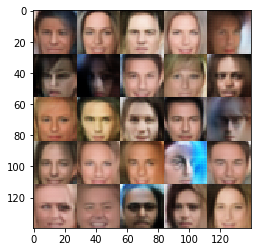

Epoch 1/1... Discriminator Loss: 0.7471... Generator Loss: 2.4495 Elapsed_time = 27.7 min Steps=  3900


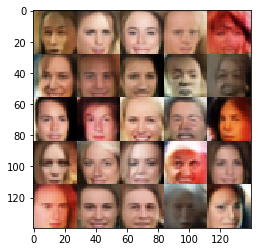

Epoch 1/1... Discriminator Loss: 0.7720... Generator Loss: 1.2795 Elapsed_time = 28.4 min Steps=  4000


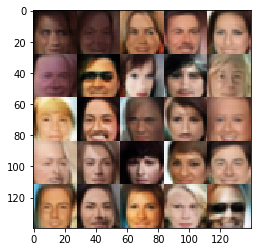

Epoch 1/1... Discriminator Loss: 0.7269... Generator Loss: 2.0668 Elapsed_time = 29.1 min Steps=  4100


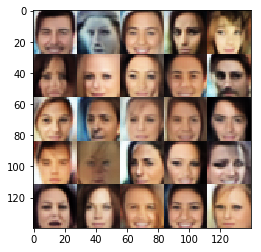

Epoch 1/1... Discriminator Loss: 0.6267... Generator Loss: 2.0651 Elapsed_time = 29.8 min Steps=  4200


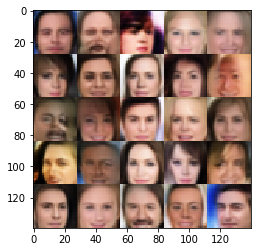

Epoch 1/1... Discriminator Loss: 3.2130... Generator Loss: 3.9286 Elapsed_time = 30.5 min Steps=  4300


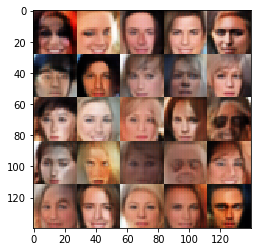

Epoch 1/1... Discriminator Loss: 0.6917... Generator Loss: 1.7758 Elapsed_time = 31.2 min Steps=  4400


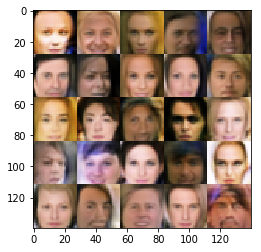

Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 1.0470 Elapsed_time = 31.9 min Steps=  4500


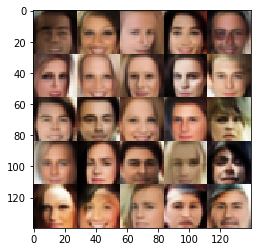

Epoch 1/1... Discriminator Loss: 0.9031... Generator Loss: 2.4497 Elapsed_time = 32.6 min Steps=  4600


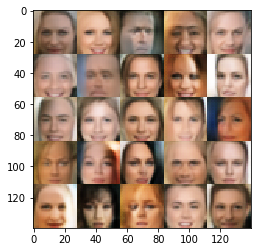

Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 1.9395 Elapsed_time = 33.3 min Steps=  4700


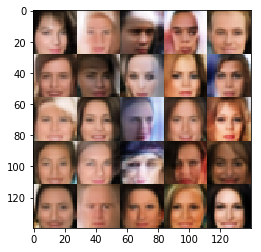

Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 1.2879 Elapsed_time = 34.0 min Steps=  4800


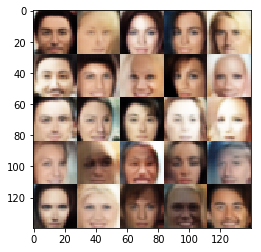

Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 1.3985 Elapsed_time = 34.7 min Steps=  4900


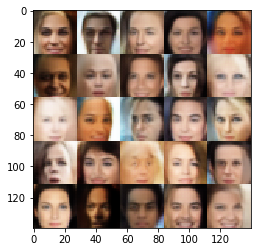

Epoch 1/1... Discriminator Loss: 0.5632... Generator Loss: 2.2517 Elapsed_time = 35.4 min Steps=  5000


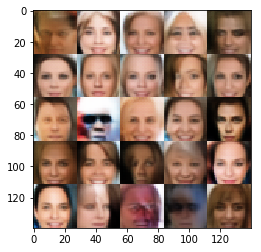

Epoch 1/1... Discriminator Loss: 0.6994... Generator Loss: 2.0558 Elapsed_time = 36.1 min Steps=  5100


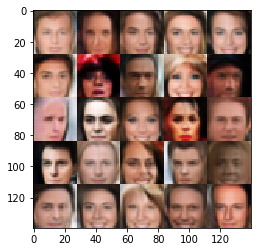

Epoch 1/1... Discriminator Loss: 0.7091... Generator Loss: 1.6333 Elapsed_time = 36.9 min Steps=  5200


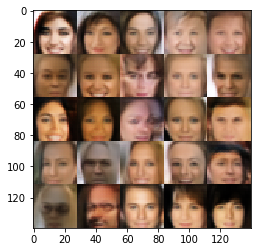

Epoch 1/1... Discriminator Loss: 0.8823... Generator Loss: 1.4612 Elapsed_time = 37.6 min Steps=  5300


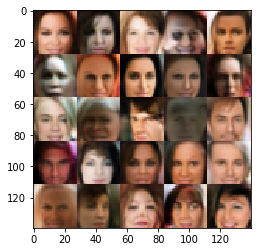

Epoch 1/1... Discriminator Loss: 0.8484... Generator Loss: 2.9007 Elapsed_time = 38.3 min Steps=  5400


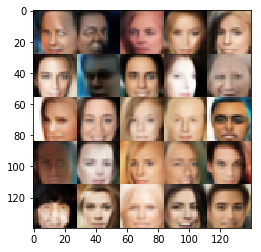

Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.2378 Elapsed_time = 39.0 min Steps=  5500


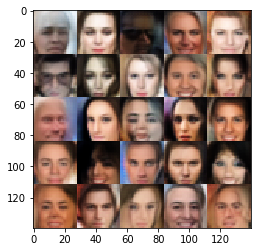

Epoch 1/1... Discriminator Loss: 0.6929... Generator Loss: 1.7344 Elapsed_time = 39.7 min Steps=  5600


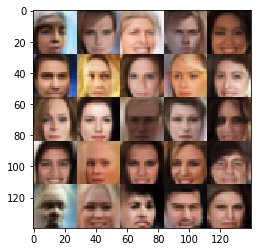

Epoch 1/1... Discriminator Loss: 0.6013... Generator Loss: 2.4706 Elapsed_time = 40.4 min Steps=  5700


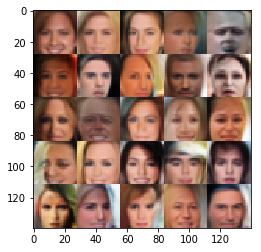

Epoch 1/1... Discriminator Loss: 1.6424... Generator Loss: 0.4685 Elapsed_time = 41.1 min Steps=  5800


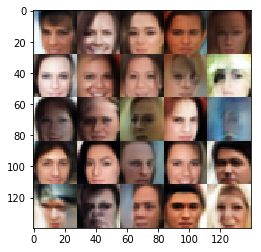

Epoch 1/1... Discriminator Loss: 0.4986... Generator Loss: 2.4806 Elapsed_time = 41.8 min Steps=  5900


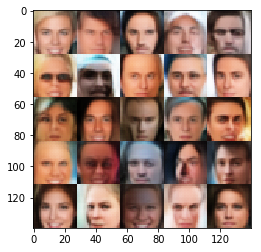

Epoch 1/1... Discriminator Loss: 0.6937... Generator Loss: 2.6774 Elapsed_time = 42.5 min Steps=  6000


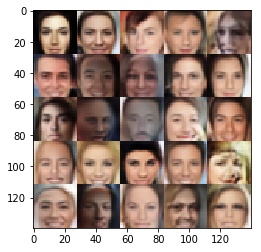

Epoch 1/1... Discriminator Loss: 1.9885... Generator Loss: 0.5368 Elapsed_time = 43.2 min Steps=  6100


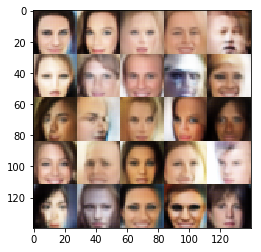

Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 2.7688 Elapsed_time = 43.9 min Steps=  6200


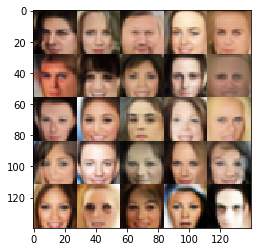

Epoch 1/1... Discriminator Loss: 0.7392... Generator Loss: 1.6628 Elapsed_time = 44.6 min Steps=  6300


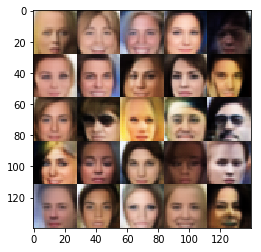

Epoch 1/1... Discriminator Loss: 0.5714... Generator Loss: 2.3382 Elapsed_time = 45.3 min Steps=  6400


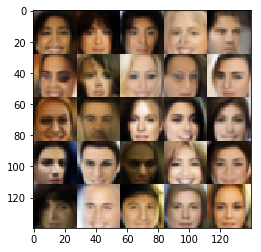

Epoch 1/1... Discriminator Loss: 0.8024... Generator Loss: 3.7784 Elapsed_time = 46.0 min Steps=  6500


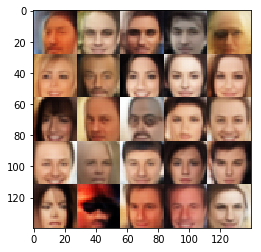

Epoch 1/1... Discriminator Loss: 0.5551... Generator Loss: 2.5843 Elapsed_time = 46.7 min Steps=  6600


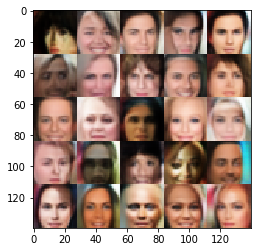

Epoch 1/1... Discriminator Loss: 0.7641... Generator Loss: 1.3994 Elapsed_time = 47.4 min Steps=  6700


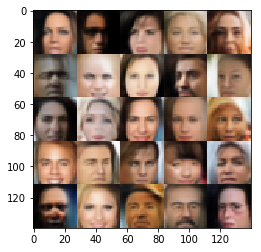


Total Training time = 47.8 min Discriminator Loss: 0.7641... Generator Loss: 1.3994


In [ ]:
batch_size = 30 #25 is fine too
z_dim = 100
learning_rate =  0.0004 # 0.0006
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.